## Iris Flower dataset

Iris Dataset: [https://en.wikipedia.org/wiki/Iris_flower_data_set]
* It is a simple and clean dataset which describes particular biological characteristics of various types of Iris flowers
* It was introduced in 1936 by Ronald Fisher.

### Aim of this analysis(Or Relevant Buisness questions): 

>1. Which features/measurements are most important to determine the flower species? If only a subset of features is important and sufficient, we can measure only those features. This would result in time and cost savings as the manual effort in measuring the size is reduced.

>2. How often are you correct when you predict a flower type and how often are you incorrect when your system predicts a species?

>3. How efficiently you can perform this flower-identification. Can you perform this very fast, like 10K flowers in 1 minute, as that will result in cost-savings?

>4. Can I measure just one feature and determine the flower species as that would result in significant cost savings (4X savings) in human effort to input the data?

>5. What is the tradeoff in our model-performance if we use just one feature vs using all the 4 features?



In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


'''downlaod iris.csv from https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv'''
#Load Iris.csv into a pandas dataFrame
iris_dataset = pd.read_csv("iris.csv")



In [67]:
# First lets analyse how many data-points and features are there in the dataset
print (iris_dataset.shape)

(150, 5)


In [68]:
# Now lets see what are the column names in our dataset
print (iris_dataset.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [69]:
#function for plotting histogram
def histogram(dataset):
    
    ''' It plots the histogram based on the species.
    If you are passing dataset, it should have the column named species'''
    
    dataset['species'].value_counts().plot(kind='bar', yticks=[i for i in range(51)],figsize=(10,10))
    plt.xticks(rotation='horizontal') #Rotate xticks
    plt.xlabel('Types of Iris')
    plt.ylabel('Count')
    plt.title('Count of types of iris on dataset')
    plt.show()

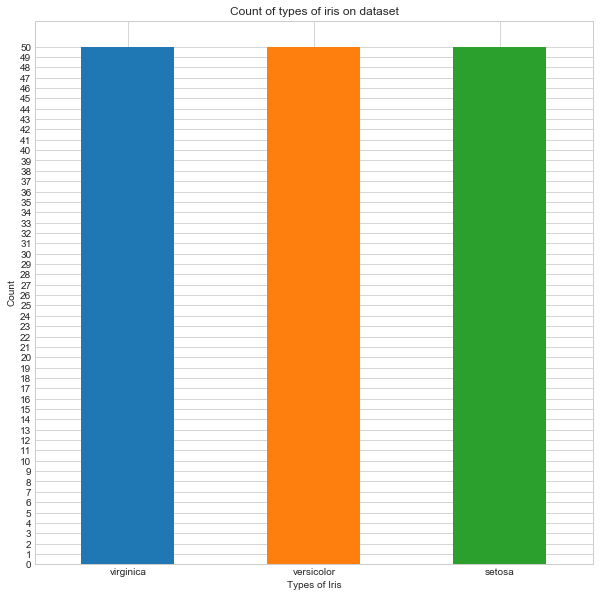

In [70]:
#Let's see how many datapoints we have of each species to decide if dataset is balanced or unbalanced
histogram(iris_dataset)

>The above result shows that Iris is a balanced dataset as the number of data points for every class is 50 and the different classes of Iris flowers are setosta,versicolor and virginica.

### Handling the missing values and categorical data.

In [72]:
#Checking the number of missing values
print(iris_dataset.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


From the above result we can say that we don't have any missing values in our dataset.

Now let's try to handle our categorical data.It will help in passing the entire dataset as input to our model.

The species of the iris flowers can be categorised as :

1 = Setosta

2 = Versicolor

3 = Verginica

In [73]:
#Changing the category of species to numbers
replace_map = {'species': {'setosta': 1, 'versicolor': 2, 'virginica': 3}}
labels = iris_dataset['species'].astype('category').cat.categories.tolist()
replace_map_comp = {'species' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
iris = iris_dataset.copy()
iris.replace(replace_map_comp, inplace=True)

Now let's see how our new data looks like.

In [74]:
#printing the first few lines of the new data set
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


So, species has been correctly encoded to numerical values.

# 1.Which features/measurements are most important to determine the flower species?

In order to answer this question , lets go step by step. 

Let's first analyse what are the correlation among different attributes of Iris Species.

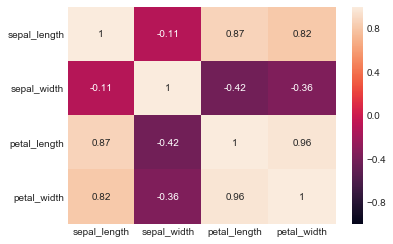

In [75]:
#Pairwise correlation between attributes
sns.heatmap(iris_dataset[['sepal_length', 'sepal_width', 'petal_length', 'petal_width' ]].corr(), vmin = -1, vmax=1, annot=True)
plt.show()


> Strong Positive Correlation can be seen ammong the following pairs:

1.sepal_length/petal_length

2.sepal_ength/petal_width

3.petal_width/petal_length

This implies that above pairwise features can be taken into consideration for classification.

>Now , lets draw the pairwise scatter plot to visulize the heatmap and answer our second question.

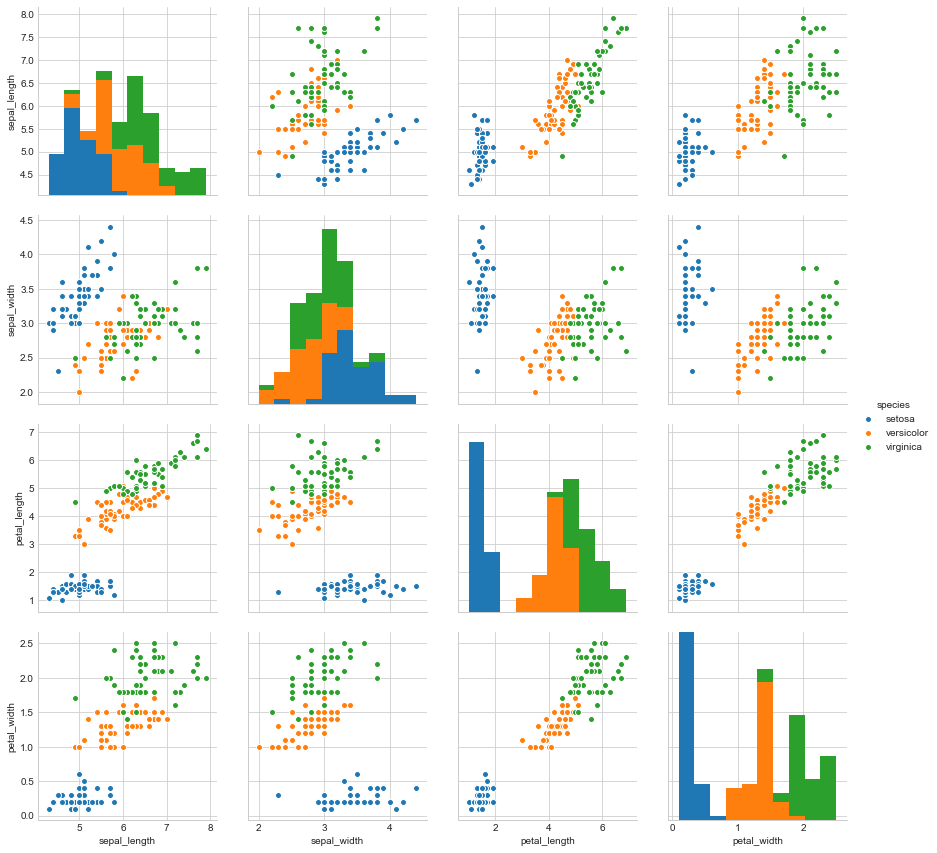

In [76]:
# Pair-Plot
plt.close();
sns.set_style("whitegrid");
sns.pairplot(iris_dataset, hue="species", size=3);
plt.show()

> In the above pair plot , the diagnol elements are PDFs for each feature.

> From the above pair plots, the features that seem to be more meaningful in classifying the iris flowers are petal length and petal width because in that pair plot we can almost easily classify virginica and versicolor as well by drawing a line  with little error. As Machine learning is not about 100% accuracy, we can go with these 2 features. 

>Also the correaltion is strongest between these two attributes as seen in the heatmap.

### Now, let's conclude simple if-else condition to classify a given new flower as one of the 3 type of Iris flowers.

>As concluded in earlier explorations that petal length and petal width will be the best features on which classification can be made, So let's separate out this scatter plot to form our if-else condition for classification.

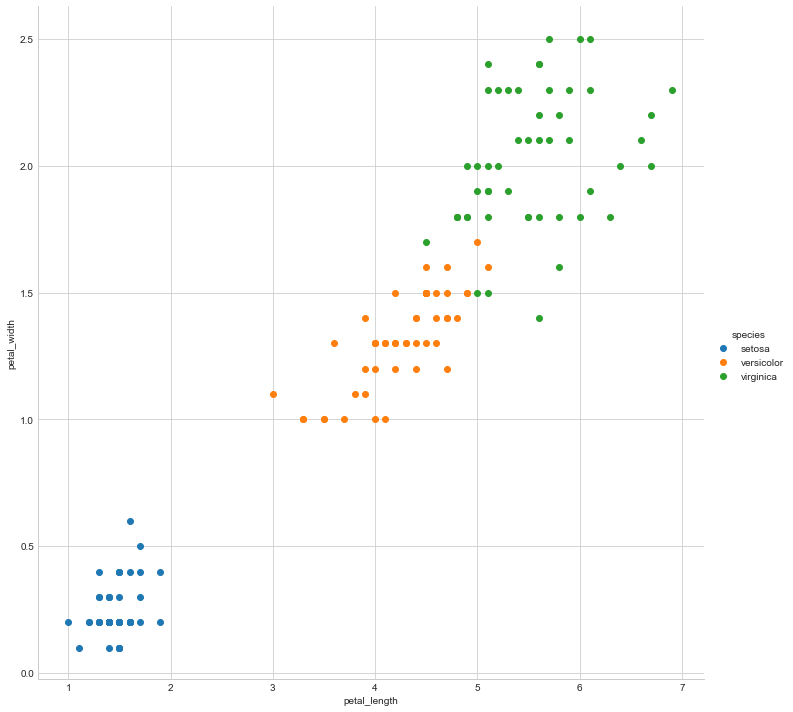

In [77]:
# Scatter plot for each flower type between petal length and petal width.

sns.set_style("whitegrid");
sns.FacetGrid(iris_dataset, hue="species", size=10) \
   .map(plt.scatter, "petal_length", "petal_width") \
   .add_legend();
plt.show();

> Now ,we can easily find an if else condition for classifying the Iris dataset:

### If-Else Condition

if(petal_length<2), then it is setosta

if(petal_length<5 and petal_width<1.75), then it is versicolor

 else , it is verginica

# 2. How often are you correct when you predict a flower type and how often are you incorrect when your system predicts a species?

In [78]:
#seperating setosta and versicolor according to our if-else condition
setosta_filter= iris_dataset.query('petal_length < 2')

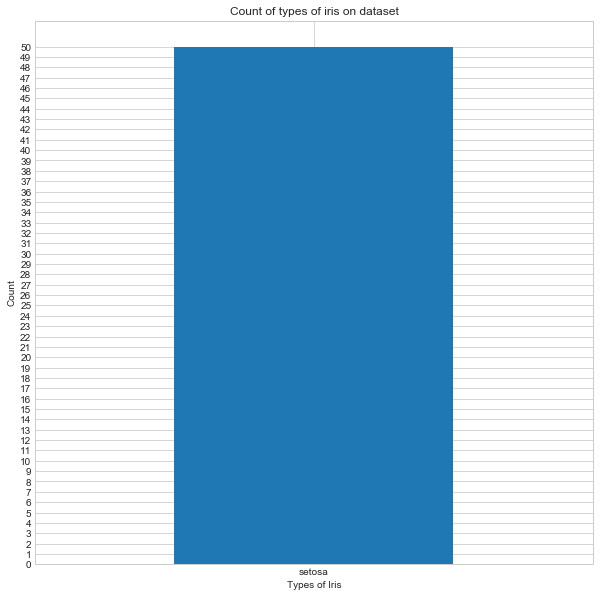

In [79]:
#For finding the numbers of setosta flowers according to our if-else condition
histogram(setosta_filter)

The above result shows that there are 50 setosta flowers in our dataset which perfectly accurate according to the given dataset.

In [80]:
#seperating setosta and versicolor according to our if-else condition
setosta_and_versicolor= iris_dataset.query('petal_length < 5' and 'petal_width<1.75')

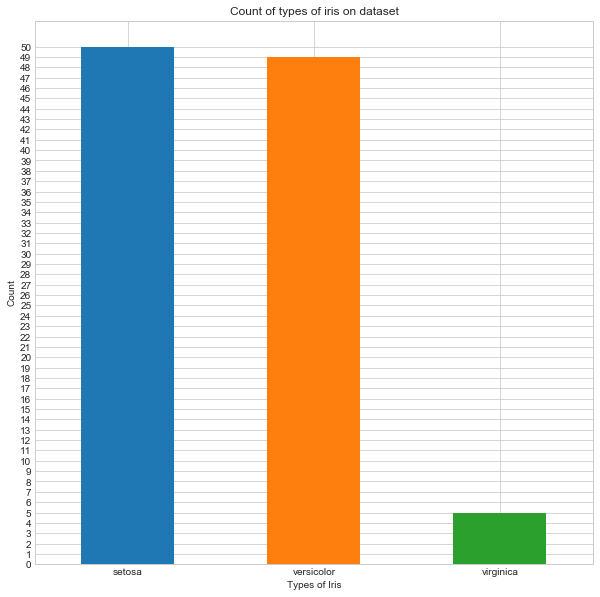

In [81]:
#For finding the numbers of setosta flowers according to our if-else condition
histogram(setosta_and_versicolor)

The above plot shows that we have counted 5 verginica flowers as versicolor and we have missed 1 versicolor.

Thus, we will be miss 5 verginica and will count 1 versicolor while predicting verginica.

Thus our error in classication are as follows:

>setosta=> 0% 

>versicolor=> 6/150 = 4%

>verginica=> 6/150 = 4%

From the above result, we can say that we will be perfectly able to predict Setosta and we might be predicting the versicolor and verginica with an error of approx. 4 percent.

# 3.How efficiently you can perform this flower-identification in terms of time complexity?

Let's first see in how much time we predict a new flower according to our if-else condition.

In [98]:
import timeit
start = timeit.timeit()

def time_testing(petal_length,petal_width,sepal_length,sepal_width):
    
    '''  This function classifies a new flower based on its features.'''
    if(petal_length<2):
        print("setosta")
    if(petal_length<5 and petal_width<1.75):
        print("versicolor")
    else:
        print("verginica")
end = timeit.timeit()
print (end - start)

0.0005950889899395406


The above result shows that we can predict a given flower in 0.005 seconds. And so, we can predict 5k flowers in about 1 seconds.

Now lets deduce a machine learning model for classification based on the above plots.

>Based on the above plots ,KNN will be the best model because in the above plots , we can see that if we classify the flowers based on the majority of which class is in its neighbour, then the plot is approximately correct.

>We will also confirm it later on by calculating the accuracy of this algorithm.

In [99]:
#importing
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
from sklearn.cross_validation import cross_val_score
iris = load_iris()
# store feature matrix in "X"
x = iris.data
# store response vector in "y"
y = iris.target
# split the data set into train and test
X_train, X_test, y_train, y_test = cross_validation.train_test_split(x, y, test_size=0.3, random_state=0)

We first need to split the data into training and testing.
Here we split the data in 70-30 ratio.
Now we will check the best value for 'k' using cross-validation.


In [100]:
# creating odd list of K for KNN
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))
# empty list that will hold cv scores
cv_scores = []
# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
# changing to misclassification error
MSE = [1 - x for x in cv_scores]
# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)


The optimal number of neighbors is 7.


We find that k=7 is the best k.

In [123]:
import timeit
# KNN with k = optimal_k
# instantiate learning model k = optimal_k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
# fitting the model
knn_optimal.fit(X_train, y_train)
# predict the response
pred = knn_optimal.predict(X_test)
# evaluate accuracy
start = timeit.timeit()
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))

end = timeit.timeit()
print("The time complexity of this classification:")
print (end - start)


The accuracy of the knn classifier for k = 7 is 97.777778%
The time complexity of this classification:
-0.005027426988817751


>Since the accuracy is 97.78%, we can choose this algorithm for classification and the time compexity is almost the same as our previous model.

# 4.Can I measure just one feature and determine the flower species as that would result in significant cost savings (4X savings) in human effort to input the data?

Based on the above conclusions, if we are forced to choose one feature, then we will be certainly choosing either petal length or petal width.

Let's see how our result will change.

Earlier if-else conditions were as follows:

                if(petal_length<2), then it is setosta

                if(petal_length<5 and petal_width<1.75), then it is versicolor

                else , it is verginica

Now we will try to modify our conditions based on only one feature.

##### Taking only petal length in consideration
         if(petal_length<2), then it is setosta

         if(petal_length<5), then it is versicolor

         else , it is verginica

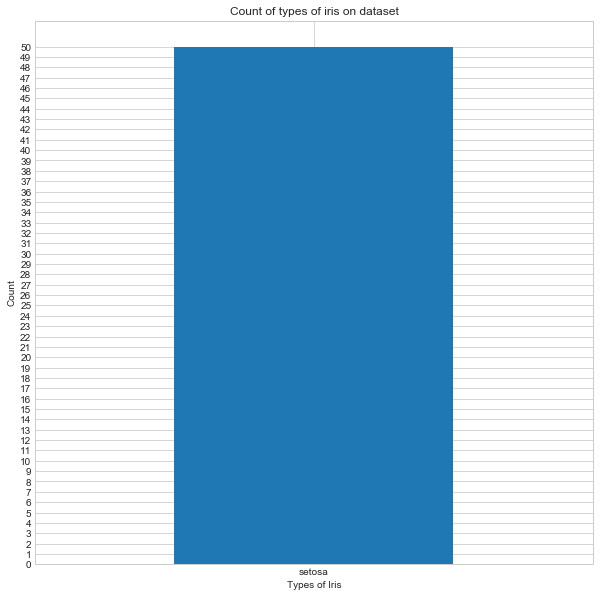

In [126]:
#seperating setosta based on petal length
setosta_length= iris_dataset.query('petal_length < 2')

#For finding the numbers of setosta flowers based on petal length
histogram(setosta_length)

The above result again shows that there are 50 setosta flowers in our dataset which perfectly accurate according to the given dataset.

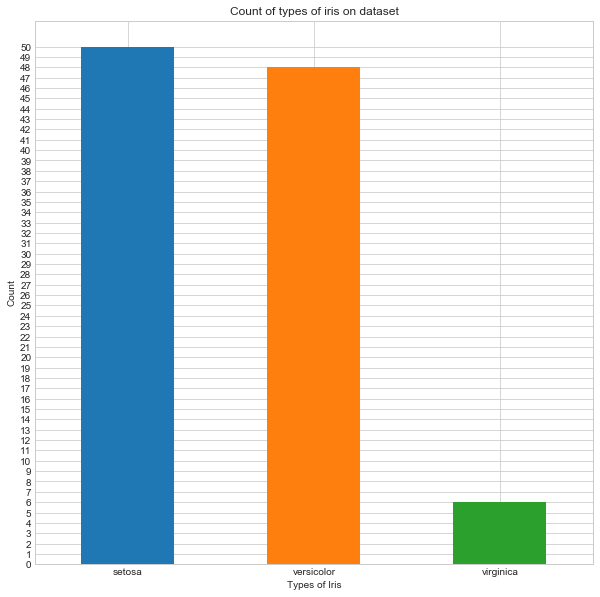

In [127]:
#seperating setosta and versicolor based on petal length
setosta_and_versicolor_length= iris_dataset.query('petal_length < 5')

#For finding the numbers of setosta and versicolor flowers based on petal length
histogram(setosta_and_versicolor_length)

The above plot shows that we have counted 6 verginica flowers as versicolor and we have missed 2 versicolor.

Thus, we will be miss 6 verginica and will count 2 versicolor while predicting versicolor.

Thus our error in classication are as follows:

>setosta=> 0% 

>versicolor=> 8/150 = 5.3%

>verginica=> 8/150 = 5.5%

From the above result, we can say that we will be perfectly able to predict Setosta and we might be predicting the versicolor and verginica with an error of approx. 5.3 percent.

##### Taking only petal width in consideration
if(petal_width<0.7), then it is setosta

if(petal_width<1.75), then it is versicolor

else , it is verginica

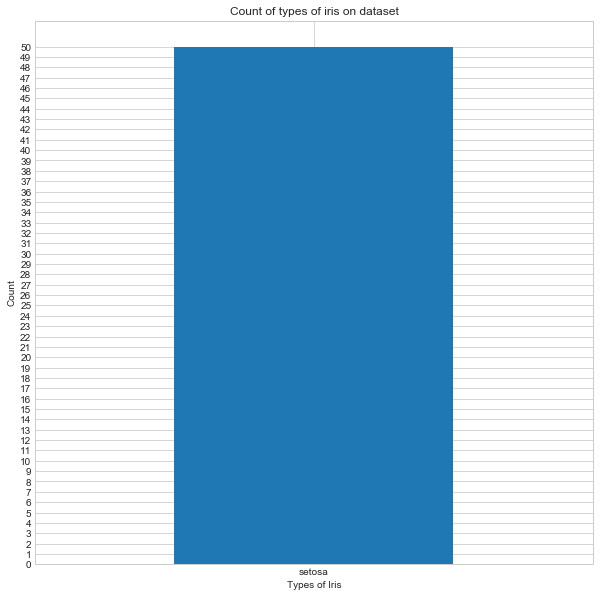

In [128]:
#seperating setosta based on petal width
setosta_width= iris_dataset.query('petal_width < 0.7')

#For finding the numbers of setosta and versicolor flowers based on petal width 
histogram(setosta_width)

The above result again shows that there are 50 setosta flowers in our dataset which perfectly accurate according to the given dataset.

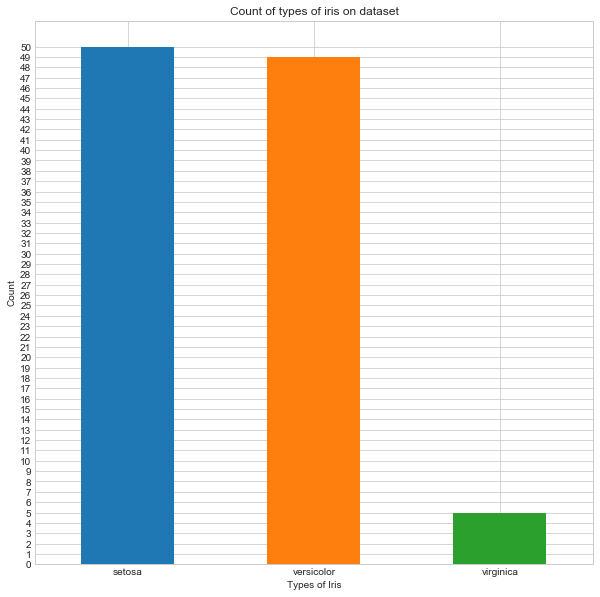

In [129]:
#seperating setosta and versicolor based on petal width
setosta_and_versicolor_width= iris_dataset.query('petal_width < 1.75')

#For finding the numbers of setosta and versicolor flowers based on petal width
histogram(setosta_and_versicolor_width)

The above plot shows that we have counted 5 verginica flowers as versicolor and we have missed 1 versicolor.

Thus, we will be miss 5 verginica and will count 1 versicolor while predicting versicolor.

Thus our error in classication are as follows:

setosta=> 0%

versicolor=> 6/150 = 4%

verginica=> 6/150 = 4%

From the above result, we can say that we will be perfectly able to predict Setosta and we might be predicting the versicolor and verginica with an error of approx. 4 percent.

#### Inference:

If we are forced to choose any one feature for classification purpose based on our if-else condition, then it seems that petal width will be the best option.

# 5.What is the tradeoff in our model-performance if we use just one feature vs using all the 4 features.

In [130]:
#Defining a function to calculate trade of by our chosen machine learning model, i.e.; KNN

def tradeof(n):
    
    ''' This function is used to predict the accuracy of the Iris dataset
    given the column number, i.e; based on one feature'''
    
    iris = load_iris()
    # store feature matrix in "X"
    x = iris.data
    x = x[:,n]
    x = x.reshape(-1, 1)
    # store response vector in "y"
    y = iris.target
    # split the data set into train and test
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(x, y, test_size=0.3, random_state=0)
    # creating odd list of K for KNN
    myList = list(range(0,50))
    neighbors = list(filter(lambda x: x % 2 != 0, myList))
    # empty list that will hold cv scores
    cv_scores = []
    # perform 10-fold cross validation
    for k in neighbors:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
        cv_scores.append(scores.mean())
    # changing to misclassification error
    MSE = [1 - x for x in cv_scores]
    # determining best k
    optimal_k = neighbors[MSE.index(min(MSE))]
    print('\nThe optimal number of neighbors is %d.' % optimal_k)
    # KNN with k = optimal_k
    # instantiate learning model k = optimal_k
    knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
    # fitting the model
    knn_optimal.fit(X_train, y_train)
    # predict the response
    pred = knn_optimal.predict(X_test)
    # evaluate accuracy
    acc = accuracy_score(y_test, pred) * 100
    print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))


In [131]:
#Accuracy of our model if we choose sepal length, ie.column 0
tradeof(0)


The optimal number of neighbors is 27.

The accuracy of the knn classifier for k = 27 is 64.444444%


In [132]:
#Accuracy of our model if we choose sepal width, ie.column 1
tradeof(1)


The optimal number of neighbors is 33.

The accuracy of the knn classifier for k = 33 is 62.222222%


In [133]:
#Accuracy of our model if we choose petal length, ie.column 2
tradeof(2)


The optimal number of neighbors is 19.

The accuracy of the knn classifier for k = 19 is 95.555556%


In [134]:
#Accuracy of our model if we choose petal width, ie.column 3
tradeof(3)


The optimal number of neighbors is 17.

The accuracy of the knn classifier for k = 17 is 95.555556%


The accuracy of the model if we use just one feature:

    sepal length : 64.4%

    sepal width  : 62.2%

    petal length : 95.5%

    petal width  : 95.5%

    The accuracy of the model if we use just all the features was calculated above and it was 97.7%.

# Conclusion
>Which features/measurements are most important to determine the flower species? If only a subset of features is important and sufficient, we can measure only those features. This would result in time and cost savings as the manual effort in measuring the size is reduced.

    Petal length and petal width are the most important to determine the flower species

>How often are you correct when you predict a flower type and how often are you incorrect when your system predicts a species?

    Error in classication are as follows:

    setosta=> 0%

    versicolor=> 6/150 = 4%

    verginica=> 6/150 = 4%
    
         We will be perfectly able to predict Setosta and we might be predicting the versicolor and verginica with an error of approx. 4 percent.

>How efficiently you can perform this flower-identification. Can you perform this very fast, like 10K flowers in 1 minute, as that will result in cost-savings?

    We can perform around 10k flowers in 1 second.

>Can I measure just one feature and determine the flower species as that would result in significant cost savings (4X savings) in human effort to input the data?

    If we are forced to choose any one feature for classification purpose based on our if-else condition, then it seems that petal width will be the best option.

>What is the tradeoff in our model-performance if we use just one feature vs using all the 4 features.

    The accuracy of the model if we use just one feature:

    sepal length : 64.4%

    sepal width  : 62.2%

    petal length : 95.5%

    petal width  : 95.5%

    The accuracy of the model if we use just all the features was calculated above and it was 97.7%.